#### Libraries

In [1]:
import os

import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import svm
from sklearn.metrics import f1_score, confusion_matrix, classification_report

from zipfile import ZipFile

%matplotlib inline

#### Constants

In [2]:
DATA_DIR = os.path.join(os.path.abspath(os.getcwd()), 'data')
PATH_TO_ZIP_FILE = os.path.join(DATA_DIR, 'emails.zip')
PATH_TO_CSV_FILE = os.path.join(DATA_DIR, 'emails.csv')

TRAINING_SET_SIZE = 0.7

#### Loading Data

In [3]:
# extract zip, if not yet extracted
if not os.path.exists(PATH_TO_CSV_FILE):
    try:
        with ZipFile(PATH_TO_ZIP_FILE, 'r') as zip_ref:
            zip_ref.extractall(DATA_DIR)
        print('CSV file has been extracted.')
    except:
        print('The zip file or data dir has been removed.')
else:
    print('CSV file already present.')

CSV file already present.


In [4]:
# load csv
df = pd.read_csv(PATH_TO_CSV_FILE)

In [5]:
df.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


#### Model inputs

In [6]:
# 3000 most common words in all emails
vocab = list(df)[1:-1]

m = df[vocab[0]].count()
X = np.zeros((m, len(vocab)))
y = df[list(df)[-1]].values

In [7]:
# filling in X
for row_idx, row in df.iterrows():
    for word_idx, word in enumerate(vocab):
        if row[word]:
            X[row_idx, word_idx] = 1

#### Test / Cross-Validation Split

In [8]:
mval = int(m * (1-TRAINING_SET_SIZE))
rand_indices = np.random.choice(m, mval, replace=False)

Xval, yval = X[rand_indices, :], y[rand_indices]
X, y = np.delete(X, rand_indices, axis=0), np.delete(y, rand_indices)

m, n = X.shape

#### Model Training

In [9]:
clf = svm.LinearSVC(dual=(m<n)) # sets dual=True if m < n
clf.fit(X, y)

LinearSVC(dual=False)

#### Model Performance

In [10]:
predictions = clf.predict(Xval)

The model has a 96.58 % accuracy.
--------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1109
           1       0.94      0.94      0.94       442

    accuracy                           0.97      1551
   macro avg       0.96      0.96      0.96      1551
weighted avg       0.97      0.97      0.97      1551

--------------------------------------------------------------
F-Measure: 0.940
--------------------------------------------------------------


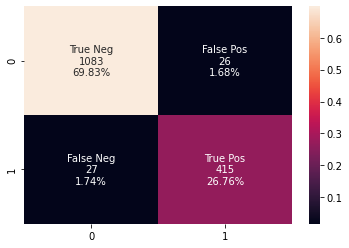

In [11]:
# Accuracy
accuracy = np.average(yval==predictions) * 100
print(f'The model has a {round(accuracy, 2)} % accuracy.')
print('--------------------------------------------------------------')

# Classification Report
print(classification_report(yval, predictions))
print('--------------------------------------------------------------')

# F-1 Score
score_2 = f1_score(yval, predictions, average = 'binary')
print('F-Measure: %.3f' % score_2)
print('--------------------------------------------------------------')

# Confusion Matrix
cf_matrix = confusion_matrix(yval, predictions)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=labels, fmt='')

pass

[Source](https://www.kaggle.com/balaka18/email-spam-classification-dataset-csv) for the data used in this notebook. 